# MACHINE LEARNING
-----

**Abiyyu Fathin Derian**

**IYKRA Data Fellowship Batch 6**

-----
## Import Library

In [1]:
# import required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

-----
## Load The Dataset

In [2]:
# Get the dataset
dataset = pd.read_csv('ML_2_Fellow.csv')

# Check the 5 first value
dataset.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Check the 5 last value
dataset.tail()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3.0,12/9/2011 12:50,4.95,12680.0,France


---
## Data Understanding

In [4]:
# Check the dimension of the dataset
dataset.shape

(541909, 8)

In [5]:
# Check the columns' name
dataset.columns

Index(['Kode_Bayar', 'Kode_Barang', 'Barang', 'Jumlah', 'Tanggal_Transaksi',
       'Harga_Satuan', 'Kode_Pelanggan', 'Negara'],
      dtype='object')

In [6]:
# Check the brief information of basic statistics
dataset.describe()

,Jumlah,Harga_Satuan,Kode_Pelanggan
count,535874.000000,535874.000000,403182.000000
mean,9.587927,4.636533,15287.687868
std,153.292222,97.302232,1714.009551
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13952.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,74215.000000,38970.000000,18287.000000


There is negative value of columns 'Jumlah' and 'Harga_Satuan'.

### Check the negative value of numerical data

In [7]:
# Check The negative value
# sum(n < 0 for n in dataset['Jumlah'].values.flatten())
negative = []
for cols in dataset['Jumlah'].tolist()[:]:
    if cols < 0:
        negative.append(cols)
    #data = data.ix[data[cols] > 0]
print(len(negative))

10545


In [8]:
# Check The negative value
negative = []
for cols in dataset['Harga_Satuan'].tolist()[:]:
    if cols < 0:
        negative.append(cols)
    #data = data.ix[data[cols] > 0]
print(len(negative))

2


In [9]:
# Check the brief information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        535874 non-null  object 
 2   Barang             534420 non-null  object 
 3   Jumlah             535874 non-null  float64
 4   Tanggal_Transaksi  535874 non-null  object 
 5   Harga_Satuan       535874 non-null  float64
 6   Kode_Pelanggan     403182 non-null  float64
 7   Negara             535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


The data type of 'Tanggal_Transaksi' is object. Whereas, it should be datetime. Therefore, we will convert it into date time datatype.

Besides, the datatype of 'Kode_Pelanggan' is float, whereas it is a categorical data, so I will convert it into int datatype.

In [10]:
# Check the total of unique value of each column
dataset.nunique()

Kode_Bayar           31847
Kode_Barang           3999
Barang                4113
Jumlah                 709
Tanggal_Transaksi    23225
Harga_Satuan          1628
Kode_Pelanggan        4370
Negara                  38
dtype: int64

In [11]:
# Check the value of 'Negara'
dataset['Negara'].unique()

array(['United Kingdom', 'France', nan, 'Australia', 'Netherlands',
       'Germany', 'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland',
       'Portugal', 'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

There is a not common data, where it is stated as 'Unspecified'. So, let us see deeper the data.

In [12]:
# See the data of Unspecified
dataset[dataset['Negara'] == 'Unspecified']

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
152712,549687,20685,DOORMAT RED RETROSPOT,2.0,4/11/2011 13:29,7.95,12363.0,Unspecified
152713,549687,22691,DOORMAT WELCOME SUNRISE,2.0,4/11/2011 13:29,7.95,12363.0,Unspecified
152714,549687,48116,DOORMAT MULTICOLOUR STRIPE,2.0,4/11/2011 13:29,7.95,12363.0,Unspecified
152715,549687,21213,PACK OF 72 SKULL CAKE CASES,24.0,4/11/2011 13:29,0.55,12363.0,Unspecified
152716,549687,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24.0,4/11/2011 13:29,0.55,12363.0,Unspecified
...,...,...,...,...,...,...,...,...
498778,578539,22560,TRADITIONAL MODELLING CLAY,24.0,11/24/2011 14:55,1.25,NaN,Unspecified
498779,578539,23570,TRADITIONAL PICK UP STICKS GAME,12.0,11/24/2011 14:55,1.25,NaN,Unspecified
498780,578539,23571,TRADITIONAL NAUGHTS & CROSSES,12.0,11/24/2011 14:55,1.65,NaN,Unspecified
498781,578539,84992,72 SWEETHEART FAIRY CAKE CASES,24.0,11/24/2011 14:55,0.55,NaN,Unspecified


Indeed, it has a valid value and a lot of data. Therefore, we will change the 'Unspecified' by the mode value.

### Check the number of values of each columns

I focus on the data that has datatype as an Object.

In [13]:
# Check the number of 'Kode_Bayar'
dataset['Kode_Bayar'].value_counts()

573585                                                                                  1101
581219                                                                                   742
581492                                                                                   720
580729                                                                                   716
558475                                                                                   689
                                                                                        ... 
537877                                                                                     1
542664,37462E,"PET MUG, GOLDFISH",1,1/31/2011 12:14,0.83,,United Kingdom                   1
C538344                                                                                    1
559497,82613b,"METAL SIGN,CUPCAKE SINGLE HOOK",1,7/8/2011 13:54,2.46,,United Kingdom       1
C579266                                                               

There is an anomaly value in the column. We need to clean it in the Data Preprocessing.

In [14]:
# Check the number of anomaly value
len(dataset['Kode_Bayar'].tolist()[:]) - dataset['Kode_Bayar'].str.isnumeric().sum()

15259

In [15]:
# Check the table with the anomaly 'Kode_Bayar'
dataset[dataset['Kode_Bayar'].str.isnumeric() == False]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,C536379,D,Discount,-1.0,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12.0,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
541649,"581538,85071C,""CHARLIE+LOLA""""EXTREMELY BUSY"""" ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5.0,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1.0,12/9/2011 11:58,1.25,17315.0,United Kingdom
541717,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5.0,12/9/2011 11:58,1.25,17315.0,United Kingdom


From the row, we can see that the 'Kode_Bayar' anomaly consists of 2 types, they are:
- Long Anomaly, contains the combination of other columns
- Short Anomaly, contains the text-including

We see that in the 'Kode_Bayar' starting with 'C', the 'Jumlah' is always negative. Then, we can indicate that this 'Kode_Bayar' is the failed transaction, such as retur. Therefore, we will remove it for the next identification, but will create the insight about it later.

In [16]:
# Check the number of 'Kode_Barang'
dataset['Kode_Barang'].value_counts()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
84967A       1
35832        1
90102        1
85226A       1
21310        1
Name: Kode_Barang, Length: 3999, dtype: int64

In [17]:
# Check the number of 'Barang'
dataset['Barang'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
 I LOVE LONDON MINI RUCKSACK             1
wrongly marked                           1
amazon adjust                            1
FOUND                                    1
PINK FLOCK PHOTO FRAME                   1
Name: Barang, Length: 4113, dtype: int64

In [18]:
# Check the number of 'Negara'
dataset['Negara'].value_counts()

United Kingdom          489721
Germany                   9448
France                    8525
EIRE                      8138
Spain                     2513
Netherlands               2355
Belgium                   2060
Switzerland               1991
Portugal                  1514
Australia                 1251
Norway                    1079
Italy                      793
Channel Islands            753
Finland                    687
Cyprus                     615
Sweden                     459
Unspecified                444
Austria                    399
Denmark                    385
Japan                      350
Poland                     340
Israel                     294
USA                        291
Hong Kong                  285
Singapore                  228
Iceland                    181
Canada                     147
Greece                     145
Malta                      126
United Arab Emirates        67
European Community          61
RSA                         58
Lebanon 

In [19]:
# Check the duplicated value of each column
duplicated_col = dataset[dataset[['Kode_Bayar', 'Kode_Barang', 'Barang', 'Tanggal_Transaksi', 
                        'Harga_Satuan', 'Kode_Pelanggan', 'Negara']].duplicated()]
duplicated_col.count()

Kode_Bayar           10071
Kode_Barang          10025
Barang               10025
Jumlah               10025
Tanggal_Transaksi    10025
Harga_Satuan         10025
Kode_Pelanggan        9931
Negara               10025
dtype: int64

In [20]:
# Check the total missing value of each column
dataset.isna().sum()

Kode_Bayar                0
Kode_Barang            6035
Barang                 7489
Jumlah                 6035
Tanggal_Transaksi      6035
Harga_Satuan           6035
Kode_Pelanggan       138727
Negara                 6035
dtype: int64

### Check the distribution of the missing value

In [21]:
# dataset[['Negara']].value_counts()
# Check the skewness of the columns that have missing value
skew(dataset['Kode_Pelanggan'].dropna())

0.02919972494198062

In [22]:
# Check the skewness of the columns that have missing value
skew(dataset['Harga_Satuan'].dropna())

185.46967516261188

In [23]:
# Check the skewness of the columns that have missing value
skew(dataset['Jumlah'].dropna())

-0.48885910208459493

----
## Data Preprocessing

### Long Anomaly: Split the data in 'Kode_Bayar'

In [24]:
# Create a variable with the anomaly value
long_anomaly = dataset[dataset['Kode_Bayar'].str.isnumeric() == False]

# Drop the value starts with "C"
long_anomaly.drop(long_anomaly[long_anomaly['Kode_Bayar'].str.startswith('C')].index, inplace = True)
long_anomaly = long_anomaly.reset_index(drop = True)
long_anomaly.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"536394,21506,""FANCY FONT BIRTHDAY CARD, "",24,1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"536477,22041,""RECORD FRAME 7"""" SINGLE SIZE "",4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"536520,22760,""TRAY, BREAKFAST IN BED"",1,12/1/2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"536520,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Split the 'Kode_bayar' by commas
ano = [x.split(',') for x in long_anomaly['Kode_Bayar']]
anomaly = pd.DataFrame(ano)
anomaly.head()

,0,1,2,3,4,5,6,7,8,9
0,536381,82567,"""AIRLINE LOUNGE","METAL SIGN""",2,12/1/2010 9:41,2.1,15311,United Kingdom,None
1,536394,21506,"""FANCY FONT BIRTHDAY CARD","""",24,12/1/2010 10:39,0.42,13408,United Kingdom,None
2,536477,22041,"""RECORD FRAME 7"""" SINGLE SIZE """,48,12/1/2010 12:27,2.1,16210,United Kingdom,None,None
3,536520,22760,"""TRAY","BREAKFAST IN BED""",1,12/1/2010 12:43,12.75,14729,United Kingdom,None
4,536520,21111,"""SWISS ROLL TOWEL","CHOCOLATE SPOTS""",1,12/1/2010 12:43,2.95,14729,United Kingdom,None


In [26]:
# Check the value_counts of 'Kode_Bayar'
anomaly[8].value_counts().head(7)

United Kingdom    3555
                   324
EIRE                35
Germany             22
France              16
Spain               15
14911               15
Name: 8, dtype: int64

In [27]:
# Get onlye the data with the right name of 'Negara'
ano = []
for i in range(len(anomaly)):
    if anomaly.iloc[i, 8] in ['United Kingdom', 'EIRE', 'Germany', 'France', 'Spain']:
        ano.append(i)
anomaly = anomaly.loc[ano]
anomaly.head()

,0,1,2,3,4,5,6,7,8,9
0,536381,82567,"""AIRLINE LOUNGE","METAL SIGN""",2,12/1/2010 9:41,2.1,15311,United Kingdom,None
1,536394,21506,"""FANCY FONT BIRTHDAY CARD","""",24,12/1/2010 10:39,0.42,13408,United Kingdom,None
3,536520,22760,"""TRAY","BREAKFAST IN BED""",1,12/1/2010 12:43,12.75,14729,United Kingdom,None
4,536520,21111,"""SWISS ROLL TOWEL","CHOCOLATE SPOTS""",1,12/1/2010 12:43,2.95,14729,United Kingdom,None
5,536524,21111,"""SWISS ROLL TOWEL","CHOCOLATE SPOTS""",6,12/1/2010 12:51,2.95,17572,United Kingdom,None


In [28]:
# Combine the name of 'Barang'
anomaly.iloc[:, 2] = (anomaly.iloc[:, 2] + anomaly.iloc[:, 3]).str.replace('"', '').str.strip()
anomaly.head()

,0,1,2,3,4,5,6,7,8,9
0,536381,82567,AIRLINE LOUNGEMETAL SIGN,"METAL SIGN""",2,12/1/2010 9:41,2.1,15311,United Kingdom,None
1,536394,21506,FANCY FONT BIRTHDAY CARD,"""",24,12/1/2010 10:39,0.42,13408,United Kingdom,None
3,536520,22760,TRAY BREAKFAST IN BED,"BREAKFAST IN BED""",1,12/1/2010 12:43,12.75,14729,United Kingdom,None
4,536520,21111,SWISS ROLL TOWEL CHOCOLATE SPOTS,"CHOCOLATE SPOTS""",1,12/1/2010 12:43,2.95,14729,United Kingdom,None
5,536524,21111,SWISS ROLL TOWEL CHOCOLATE SPOTS,"CHOCOLATE SPOTS""",6,12/1/2010 12:51,2.95,17572,United Kingdom,None


In [29]:
# Remove the unnacessary columns
anomaly = anomaly.drop([3, 9], axis = 1)
anomaly

,0,1,2,4,5,6,7,8
0,536381,82567,AIRLINE LOUNGEMETAL SIGN,2,12/1/2010 9:41,2.1,15311,United Kingdom
1,536394,21506,FANCY FONT BIRTHDAY CARD,24,12/1/2010 10:39,0.42,13408,United Kingdom
3,536520,22760,TRAY BREAKFAST IN BED,1,12/1/2010 12:43,12.75,14729,United Kingdom
4,536520,21111,SWISS ROLL TOWEL CHOCOLATE SPOTS,1,12/1/2010 12:43,2.95,14729,United Kingdom
5,536524,21111,SWISS ROLL TOWEL CHOCOLATE SPOTS,6,12/1/2010 12:51,2.95,17572,United Kingdom
...,...,...,...,...,...,...,...,...
5962,581492,22819,BIRTHDAY CARD RETRO SPOT,3,12/9/2011 10:03,0.42,,United Kingdom
5963,581494,21506,FANCY FONT BIRTHDAY CARD,12,12/9/2011 10:13,0.42,12518,Germany
5967,581501,22165,DIAMANTE HEART SHAPED WALL MIRROR,12,12/9/2011 10:46,3.95,12985,United Kingdom
5968,581516,21111,SWISS ROLL TOWEL CHOCOLATE SPOTS,24,12/9/2011 11:26,1.25,14422,United Kingdom


In [30]:
# Rename the column name
anomaly.rename(columns = {0: 'Kode_Bayar', 1: 'Kode_Barang', 2: 'Barang', 4: 'Jumlah', 
                          5: 'Tanggal_Transaksi', 6: 'Harga_Satuan', 7: 'Kode_Pelanggan', 8: 'Negara'},
                          inplace = True)
anomaly['Kode_Bayar'].value_counts()

540551    13
573585    11
540848    11
540418    10
540352    10
          ..
553001     1
564743     1
573269     1
545660     1
575206     1
Name: Kode_Bayar, Length: 1814, dtype: int64

In [31]:
# Only get a numerical data in 'Kode_Bayar'
dataset = dataset[dataset['Kode_Bayar'].str.isnumeric() == True]

In [32]:
# Combine the clean data with the original data
dataset_cleaned = pd.concat([dataset, anomaly], axis = 0)
dataset_cleaned

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
5962,581492,22819,BIRTHDAY CARD RETRO SPOT,3,12/9/2011 10:03,0.42,,United Kingdom
5963,581494,21506,FANCY FONT BIRTHDAY CARD,12,12/9/2011 10:13,0.42,12518,Germany
5967,581501,22165,DIAMANTE HEART SHAPED WALL MIRROR,12,12/9/2011 10:46,3.95,12985,United Kingdom
5968,581516,21111,SWISS ROLL TOWEL CHOCOLATE SPOTS,24,12/9/2011 11:26,1.25,14422,United Kingdom


In [33]:
# Check if there any non-numerical value of 'Kode_Bayar'
dataset_cleaned['Kode_Bayar'].str.isnumeric().sum()

530293

In [34]:
# Change thedatatype of 'Kode_Pelanggan'
dataset_cleaned['Kode_Pelanggan'] = pd.to_numeric(dataset_cleaned['Kode_Pelanggan'], errors='coerce')

### Drop duplicate value

In [35]:
dataset_cleaned.drop_duplicates(inplace = True)
dataset_cleaned.shape

(525074, 8)

### Impute missing value

For 'Kode_Pelanggan', I impute with mean due to the skewness score almost near to zero, then for the rest, I imput with median due to the skewness that much far than zero.

In [36]:
# Impute missing value
dataset_cleaned['Jumlah'] = dataset_cleaned['Jumlah'].fillna(dataset_cleaned['Jumlah'].median())
dataset_cleaned['Jumlah'].isna().sum()

0

In [37]:
# Impute missing value
dataset_cleaned['Harga_Satuan'] = dataset_cleaned['Harga_Satuan'].fillna(dataset_cleaned['Harga_Satuan'].median())
dataset_cleaned['Harga_Satuan'].isna().sum()

0

In [38]:
# Impute missing value
dataset_cleaned['Kode_Pelanggan'] = dataset_cleaned['Kode_Pelanggan'].fillna(dataset_cleaned['Kode_Pelanggan'].mean())
dataset_cleaned['Kode_Pelanggan'].isna().sum()

0

For the categorical columns such as 'Kode_Barang', 'Barang', 'Tanggal_Transaksi', 'Negara', I will impute the value with mode.

In [39]:
# Impute missing value
dataset_cleaned['Kode_Barang'] = dataset_cleaned['Kode_Barang'].fillna(dataset_cleaned['Kode_Barang'].mode().iloc[0])
dataset_cleaned['Kode_Barang'].isna().sum()

0

In [40]:
# Impute missing value
dataset_cleaned['Barang'] = dataset_cleaned['Barang'].fillna(dataset_cleaned['Barang'].mode().iloc[0])
dataset_cleaned['Barang'].isna().sum()

0

In [41]:
# Impute missing value
dataset_cleaned['Tanggal_Transaksi'] = dataset_cleaned['Tanggal_Transaksi'].fillna(dataset_cleaned['Tanggal_Transaksi'].mode().iloc[0])
dataset_cleaned['Tanggal_Transaksi'].isna().sum()

0

In [42]:
# Impute missing value
dataset_cleaned['Negara'] = dataset_cleaned['Negara'].replace('Unspecified', np.nan)
dataset_cleaned['Negara'] = dataset_cleaned['Negara'].fillna(dataset_cleaned['Negara'].mode().iloc[0])
dataset_cleaned['Negara'].isna().sum()
dataset_cleaned['Negara'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Brazil', 'USA', 'European Community',
       'Malta', 'RSA'], dtype=object)

In [43]:
dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525074 entries, 0 to 5970
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         525074 non-null  object 
 1   Kode_Barang        525074 non-null  object 
 2   Barang             525074 non-null  object 
 3   Jumlah             525074 non-null  object 
 4   Tanggal_Transaksi  525074 non-null  object 
 5   Harga_Satuan       525074 non-null  object 
 6   Kode_Pelanggan     525074 non-null  float64
 7   Negara             525074 non-null  object 
dtypes: float64(1), object(7)
memory usage: 36.1+ MB


Let us see the missing value of the dataset again

In [44]:
# Check the total missing value of each column
dataset_cleaned.isna().sum()

Kode_Bayar           0
Kode_Barang          0
Barang               0
Jumlah               0
Tanggal_Transaksi    0
Harga_Satuan         0
Kode_Pelanggan       0
Negara               0
dtype: int64

### Convert datatype

In [45]:
# Check the datatype
dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525074 entries, 0 to 5970
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         525074 non-null  object 
 1   Kode_Barang        525074 non-null  object 
 2   Barang             525074 non-null  object 
 3   Jumlah             525074 non-null  object 
 4   Tanggal_Transaksi  525074 non-null  object 
 5   Harga_Satuan       525074 non-null  object 
 6   Kode_Pelanggan     525074 non-null  float64
 7   Negara             525074 non-null  object 
dtypes: float64(1), object(7)
memory usage: 36.1+ MB


In [46]:
# Convert datatype of 'Kode_Bayar' into int
dataset_cleaned['Kode_Bayar'] = dataset_cleaned['Kode_Bayar'].astype('int')
dataset_cleaned['Kode_Bayar']

0       536365
1       536365
2       536365
3       536365
4       536365
         ...  
5962    581492
5963    581494
5967    581501
5968    581516
5970    581578
Name: Kode_Bayar, Length: 525074, dtype: int64

In [47]:
# Convert datatype of 'Jumlah' into int
dataset_cleaned['Jumlah'] = dataset_cleaned['Jumlah'].astype('float')
dataset_cleaned['Jumlah']

0        6.0
1        6.0
2        8.0
3        6.0
4        6.0
        ... 
5962     3.0
5963    12.0
5967    12.0
5968    24.0
5970    12.0
Name: Jumlah, Length: 525074, dtype: float64

In [48]:
# Convert datatype of 'Harga_Satuan' into int
dataset_cleaned['Harga_Satuan'] = dataset_cleaned['Harga_Satuan'].astype('float')
dataset_cleaned['Harga_Satuan']

0       2.55
1       3.39
2       2.75
3       3.39
4       3.39
        ... 
5962    0.42
5963    0.42
5967    3.95
5968    1.25
5970    0.42
Name: Harga_Satuan, Length: 525074, dtype: float64

In [49]:
# Convert datatype tanggal_transaksi into datetime
dataset_cleaned['Tanggal_Transaksi'] = pd.to_datetime(dataset_cleaned['Tanggal_Transaksi'])
dataset_cleaned['Tanggal_Transaksi']

0      2010-12-01 08:26:00
1      2010-12-01 08:26:00
2      2010-12-01 08:26:00
3      2010-12-01 08:26:00
4      2010-12-01 08:26:00
               ...        
5962   2011-12-09 10:03:00
5963   2011-12-09 10:13:00
5967   2011-12-09 10:46:00
5968   2011-12-09 11:26:00
5970   2011-12-09 12:16:00
Name: Tanggal_Transaksi, Length: 525074, dtype: datetime64[ns]

In [50]:
# Convert datatype of 'Kode_Pelanggan' into int
dataset_cleaned['Kode_Pelanggan'] = dataset_cleaned['Kode_Pelanggan'].astype('int')
dataset_cleaned['Kode_Pelanggan']

0       17850
1       17850
2       17850
3       17850
4       17850
        ...  
5962    15288
5963    12518
5967    12985
5968    14422
5970    12713
Name: Kode_Pelanggan, Length: 525074, dtype: int64

In [51]:
dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525074 entries, 0 to 5970
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Kode_Bayar         525074 non-null  int64         
 1   Kode_Barang        525074 non-null  object        
 2   Barang             525074 non-null  object        
 3   Jumlah             525074 non-null  float64       
 4   Tanggal_Transaksi  525074 non-null  datetime64[ns]
 5   Harga_Satuan       525074 non-null  float64       
 6   Kode_Pelanggan     525074 non-null  int64         
 7   Negara             525074 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 36.1+ MB


### Clean the wrong name of 'Barang'

In the dataset_cleaned, there is several value of column 'Barang' that is actually not the real name of items. It can be identified by the non-capital word, where the real item name is shown by the all-capital words. Therefore, I will remove the things that is not identified as real name.

In [52]:
# Delete the unappropriate 'Barang'
dataset_cleaned = dataset_cleaned[dataset_cleaned['Barang'].str.isupper()]
dataset_cleaned.sort_values(by = 'Jumlah', ascending = True).reset_index(drop = True)

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,566768,16045,WHITE HANGING HEART T-LIGHT HOLDER,-3667.0,2011-09-14 17:53:00,0.00,15288,United Kingdom
1,565304,16259,WHITE HANGING HEART T-LIGHT HOLDER,-3167.0,2011-09-02 12:18:00,0.00,15288,United Kingdom
2,560600,18007,WHITE HANGING HEART T-LIGHT HOLDER,-2834.0,2011-07-19 17:04:00,0.00,15288,United Kingdom
3,550133,85099F,WHITE HANGING HEART T-LIGHT HOLDER,-1092.0,2011-04-14 13:49:00,0.00,15288,United Kingdom
4,540241,35957,WHITE HANGING HEART T-LIGHT HOLDER,-939.0,2011-01-05 15:17:00,0.00,15288,United Kingdom
...,...,...,...,...,...,...,...,...
522378,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800.0,2011-10-27 12:26:00,0.21,12901,United Kingdom
522379,542504,37413,WHITE HANGING HEART T-LIGHT HOLDER,5568.0,2011-01-28 12:03:00,0.00,15288,United Kingdom
522380,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540.0,2011-11-25 15:57:00,0.00,13256,United Kingdom
522381,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:01:00,1.04,12346,United Kingdom


-----
## Asked Questions

### 1. What items customers buy the most and are there any items we should ignore?

**Answer:**

In [53]:
# Get the value and remove the negative value
answer_1 = dataset_cleaned.copy()
answer_1 = dataset_cleaned[dataset_cleaned['Jumlah'] > 0]
answer_1.sort_values(by = 'Jumlah', ascending = False).reset_index(drop = True)

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,581483,23843,PAPER CRAFT LITTLE BIRDIE,80995.0,2011-12-09 09:15:00,2.08,16446,United Kingdom
1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:01:00,1.04,12346,United Kingdom
2,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540.0,2011-11-25 15:57:00,0.00,13256,United Kingdom
3,542504,37413,WHITE HANGING HEART T-LIGHT HOLDER,5568.0,2011-01-28 12:03:00,0.00,15288,United Kingdom
4,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800.0,2011-10-27 12:26:00,0.21,12901,United Kingdom
...,...,...,...,...,...,...,...,...
521508,549294,20726,LUNCH BAG WOODLAND,1.0,2011-04-07 19:27:00,1.65,13230,United Kingdom
521509,549294,20725,LUNCH BAG RED RETROSPOT,1.0,2011-04-07 19:27:00,1.65,13230,United Kingdom
521510,559337,22358,KINGS CHOICE TEA CADDY,1.0,2011-07-07 16:27:00,2.46,15288,United Kingdom
521511,549294,22698,PINK REGENCY TEACUP AND SAUCER,1.0,2011-04-07 19:27:00,2.95,13230,United Kingdom


### Items that customer buy the most

In [54]:
# Count the most buy items
items_most = answer_1[['Barang', 'Jumlah']].groupby('Barang').sum().reset_index()
items_most.sort_values(by = 'Jumlah', ascending = False).reset_index(drop = True)

,Barang,Jumlah
0,PAPER CRAFT LITTLE BIRDIE,80995.0
1,MEDIUM CERAMIC TOP STORAGE JAR,78033.0
2,WHITE HANGING HEART T-LIGHT HOLDER,70423.0
3,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951.0
4,JUMBO BAG RED RETROSPOT,48375.0
...,...,...
3936,TEA TIME BREAKFAST BASKET,1.0
3937,COUNTRY COTTAGE DOORSTOP GREEN,1.0
3938,BLACK GLASS/SHELL/PEARL NECKLACE,1.0
3939,PINK CRYSTAL GUITAR PHONE CHARM,1.0


### Items that shoud be ignored

I define the ignorance itself is the items that is not interesting to buy for the next.
To determine the item that shuld be ignored, I used criteria with the zero number of items that is stated by the smallest sum of 'Jumlah' of each 'Barang'.

In [55]:
# Group by the table with 'Barang' and 'Country'
items_ignored = answer_1[['Barang', 'Jumlah']]
items_ignored.sort_values(by = 'Jumlah', ascending = True).reset_index(drop = True)

,Barang,Jumlah
0,GLOW IN DARK DOLPHINS,1.0
1,FELTCRAFT GIRL AMELIE KIT,1.0
2,FELTCRAFT BOY JEAN-PAUL KIT,1.0
3,FELTCRAFT GIRL NICOLE KIT,1.0
4,ZINC SWEETHEART SOAP DISH,1.0
...,...,...
521508,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800.0
521509,WHITE HANGING HEART T-LIGHT HOLDER,5568.0
521510,ASSTD DESIGN 3D PAPER STICKERS,12540.0
521511,MEDIUM CERAMIC TOP STORAGE JAR,74215.0


The negative value of the 'Jumlah' means that there is retur when purchase.
Because the negative value in 'Jumlah' represents the retur, that means it should not be ignored. Therefore, I will delete all negative value to get the smallest number of 'Jumlah'.

In [56]:
# Delete the negative value
items_ignored = items_ignored[items_ignored['Jumlah'] > 0]
items_ignored.sort_values(by = 'Jumlah', ascending = True).reset_index(drop = True)

,Barang,Jumlah
0,GLOW IN DARK DOLPHINS,1.0
1,FELTCRAFT GIRL AMELIE KIT,1.0
2,FELTCRAFT BOY JEAN-PAUL KIT,1.0
3,FELTCRAFT GIRL NICOLE KIT,1.0
4,ZINC SWEETHEART SOAP DISH,1.0
...,...,...
521508,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800.0
521509,WHITE HANGING HEART T-LIGHT HOLDER,5568.0
521510,ASSTD DESIGN 3D PAPER STICKERS,12540.0
521511,MEDIUM CERAMIC TOP STORAGE JAR,74215.0


The fac is that there is no zero value. Therefore, we will ignore all items total in buying that is less than 5 because its number is not so significant in the purchasing number.

In [57]:
# Get the 'Jumlah' that is less than 5
# Delete the negative value
items_ignored = items_ignored[items_ignored['Jumlah'] < 5]
items_ignored.groupby(['Barang', 'Jumlah']).sum().sort_values(by = 'Jumlah', ascending = True).reset_index()

,Barang,Jumlah
0,4 PURPLE FLOCK DINNER CANDLES,1.0
1,PACK OF 6 SWEETIE GIFT BOXES,1.0
2,STRAWBERRY BATH SPONGE,1.0
3,DOLLY GIRL LUNCH BOX,1.0
4,PACK OF 6 SMALL FRUIT STRAWS,1.0
...,...,...
12508,MULTICOLOUR HONEYCOMB FAN,4.0
12509,MULTICOLOUR 3D BALLS GARLAND,4.0
12510,MULTI HEARTS STICKERS,4.0
12511,MUM'S KITCHEN CLOCK,4.0


As the result said, in my opinion, there are about 12513 product that should be ignored because the number of purchasing less than 5 is not so signficant in the number of transaction.

### 2. What is our strategy to increase sales based on our export destination countries?

**Answer:**

In [58]:
answer_2 = dataset_cleaned.copy()
answer_2 = dataset_cleaned[dataset_cleaned['Jumlah'] > 0]
answer_2.sort_values(by = 'Jumlah', ascending = False).reset_index(drop = True)

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,581483,23843,PAPER CRAFT LITTLE BIRDIE,80995.0,2011-12-09 09:15:00,2.08,16446,United Kingdom
1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:01:00,1.04,12346,United Kingdom
2,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540.0,2011-11-25 15:57:00,0.00,13256,United Kingdom
3,542504,37413,WHITE HANGING HEART T-LIGHT HOLDER,5568.0,2011-01-28 12:03:00,0.00,15288,United Kingdom
4,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800.0,2011-10-27 12:26:00,0.21,12901,United Kingdom
...,...,...,...,...,...,...,...,...
521508,549294,20726,LUNCH BAG WOODLAND,1.0,2011-04-07 19:27:00,1.65,13230,United Kingdom
521509,549294,20725,LUNCH BAG RED RETROSPOT,1.0,2011-04-07 19:27:00,1.65,13230,United Kingdom
521510,559337,22358,KINGS CHOICE TEA CADDY,1.0,2011-07-07 16:27:00,2.46,15288,United Kingdom
521511,549294,22698,PINK REGENCY TEACUP AND SAUCER,1.0,2011-04-07 19:27:00,2.95,13230,United Kingdom


In [59]:
# Create column Total
answer_2['Total'] = answer_2['Jumlah'] * answer_2['Harga_Satuan']
answer_2.sort_values(by = 'Total', ascending = False)

<ipython-input-59-7c5adcd83887>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_2['Total'] = answer_2['Jumlah'] * answer_2['Harga_Satuan']


,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Total
5951,581483,23843,PAPER CRAFT LITTLE BIRDIE,80995.0,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60.0,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.00
15017,537632,AMAZONFEE,AMAZON FEE,1.0,2010-12-07 15:08:00,13541.33,15288,United Kingdom,13541.33
173382,551697,POST,POSTAGE,1.0,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75
...,...,...,...,...,...,...,...,...,...
41094,539750,21481,FAWN BLUE HOT WATER BOTTLE,1.0,2010-12-21 15:40:00,0.00,15288,United Kingdom,0.00
375309,569458,20984,WHITE HANGING HEART T-LIGHT HOLDER,58.0,2011-10-04 11:31:00,0.00,15288,United Kingdom,0.00
41072,539750,21080,SET/20 RED RETROSPOT PAPER NAPKINS,2.0,2010-12-21 15:40:00,0.00,15288,United Kingdom,0.00
497677,578456,22579,WHITE HANGING HEART T-LIGHT HOLDER,11.0,2011-11-24 12:29:00,0.00,15288,United Kingdom,0.00


In [60]:
answer_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521513 entries, 0 to 5970
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Kode_Bayar         521513 non-null  int64         
 1   Kode_Barang        521513 non-null  object        
 2   Barang             521513 non-null  object        
 3   Jumlah             521513 non-null  float64       
 4   Tanggal_Transaksi  521513 non-null  datetime64[ns]
 5   Harga_Satuan       521513 non-null  float64       
 6   Kode_Pelanggan     521513 non-null  int64         
 7   Negara             521513 non-null  object        
 8   Total              521513 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 39.8+ MB


In [61]:
# Select the appropriated column
answer_2 = answer_2[['Negara', 'Barang', 'Jumlah', 'Tanggal_Transaksi', 'Total']]
answer_2.sort_values(by = 'Total', ascending = False)

,Negara,Barang,Jumlah,Tanggal_Transaksi,Total
5951,United Kingdom,PAPER CRAFT LITTLE BIRDIE,80995.0,2011-12-09 09:15:00,168469.60
61619,United Kingdom,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:01:00,77183.60
222680,United Kingdom,PICNIC BASKET WICKER 60 PIECES,60.0,2011-06-10 15:28:00,38970.00
15017,United Kingdom,AMAZON FEE,1.0,2010-12-07 15:08:00,13541.33
173382,United Kingdom,POSTAGE,1.0,2011-05-03 13:46:00,8142.75
...,...,...,...,...,...
41094,United Kingdom,FAWN BLUE HOT WATER BOTTLE,1.0,2010-12-21 15:40:00,0.00
375309,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,58.0,2011-10-04 11:31:00,0.00
41072,United Kingdom,SET/20 RED RETROSPOT PAPER NAPKINS,2.0,2010-12-21 15:40:00,0.00
497677,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,11.0,2011-11-24 12:29:00,0.00


In [62]:
# Groupby 'Negara'
groupby_negara = answer_2.groupby(['Negara', 'Barang'])
groupby_negara.first().sort_values(by = 'Total', ascending = False)

Jumlah  \
Negara         Barang                                        
United Kingdom PAPER CRAFT  LITTLE BIRDIE          80995.0   
               MEDIUM CERAMIC TOP STORAGE JAR      74215.0   
               PICNIC BASKET WICKER 60 PIECES         60.0   
               AMAZON FEE                              1.0   
Japan          ROUND SNACK BOXES SET OF 4 FRUITS    1488.0   
...                                                    ...   
United Kingdom TRAVEL CARD WALLET DOTCOMGIFTSHOP     200.0   
               AMAZON                                  1.0   
Netherlands    POLKADOT RAIN HAT                     144.0   
United Kingdom FBA                                   160.0   
               CHILDS GARDEN RAKE BLUE                 1.0   

                                                    Tanggal_Transaksi  \
Negara         Barang                                                   
United Kingdom PAPER CRAFT  LITTLE BIRDIE         2011-12-09 09:15:00   
               MEDIUM CERAMIC TOP STORAGE JAR     2011-01-18 10:01:00   
               PICNIC BASKET WICKER 60 PIECES     2011-06-10 15:28:00   
               AMAZON FEE                         2010-12-07 15:08:00   
Japan          ROUND SNACK BOXES SET OF 4 FRUITS  2010-12-09 10:44:00   
...                                                               ...   
United Kingdom TRAVEL CARD WALLET DOTCOMGIFTSHOP  2011-07-07 12:35:00   
               AMAZON                             2011-11-25 10:49:00   
Netherlands    POLKADOT RAIN HAT                  2011-08-26 14:19:00   
United Kingdom FBA                                2011-07-19 13:44:00   
               CHILDS GARDEN RAKE BLUE            2010-12-07 11:48:00   

                                                       Total  
Negara         Barang                                         
United Kingdom PAPER CRAFT  LITTLE BIRDIE          168469.60  
               MEDIUM CERAMIC TOP STORAGE JAR       77183.60  
               PICNIC BASKET WICKER 60 PIECES       38970.00  
               AMAZON FEE                           13541.33  
Japan          ROUND SNACK BOXES SET OF 4 FRUITS     3794.40  
...                                                      ...  
United Kingdom TRAVEL CARD WALLET DOTCOMGIFTSHOP        0.00  
               AMAZON                                   0.00  
Netherlands    POLKADOT RAIN HAT                        0.00  
United Kingdom FBA                                      0.00  
               CHILDS GARDEN RAKE BLUE                  0.00  

[19360 rows x 3 columns]

In [63]:
# Check the least item in each country
groupby_negara.first().sort_values(by = 'Total', ascending = True)

Jumlah  \
Negara         Barang                                        
United Kingdom TRAVEL CARD WALLET DOTCOMGIFTSHOP     200.0   
               CHILDS GARDEN RAKE BLUE                 1.0   
               AMAZON                                  1.0   
EIRE           VINTAGE LEAF MAGNETIC NOTEPAD          12.0   
Netherlands    POLKADOT RAIN HAT                     144.0   
...                                                    ...   
Japan          ROUND SNACK BOXES SET OF 4 FRUITS    1488.0   
United Kingdom AMAZON FEE                              1.0   
               PICNIC BASKET WICKER 60 PIECES         60.0   
               MEDIUM CERAMIC TOP STORAGE JAR      74215.0   
               PAPER CRAFT  LITTLE BIRDIE          80995.0   

                                                    Tanggal_Transaksi  \
Negara         Barang                                                   
United Kingdom TRAVEL CARD WALLET DOTCOMGIFTSHOP  2011-07-07 12:35:00   
               CHILDS GARDEN RAKE BLUE            2010-12-07 11:48:00   
               AMAZON                             2011-11-25 10:49:00   
EIRE           VINTAGE LEAF MAGNETIC NOTEPAD      2011-07-18 08:32:00   
Netherlands    POLKADOT RAIN HAT                  2011-08-26 14:19:00   
...                                                               ...   
Japan          ROUND SNACK BOXES SET OF 4 FRUITS  2010-12-09 10:44:00   
United Kingdom AMAZON FEE                         2010-12-07 15:08:00   
               PICNIC BASKET WICKER 60 PIECES     2011-06-10 15:28:00   
               MEDIUM CERAMIC TOP STORAGE JAR     2011-01-18 10:01:00   
               PAPER CRAFT  LITTLE BIRDIE         2011-12-09 09:15:00   

                                                       Total  
Negara         Barang                                         
United Kingdom TRAVEL CARD WALLET DOTCOMGIFTSHOP        0.00  
               CHILDS GARDEN RAKE BLUE                  0.00  
               AMAZON                                   0.00  
EIRE           VINTAGE LEAF MAGNETIC NOTEPAD            0.00  
Netherlands    POLKADOT RAIN HAT                        0.00  
...                                                      ...  
Japan          ROUND SNACK BOXES SET OF 4 FRUITS     3794.40  
United Kingdom AMAZON FEE                           13541.33  
               PICNIC BASKET WICKER 60 PIECES       38970.00  
               MEDIUM CERAMIC TOP STORAGE JAR       77183.60  
               PAPER CRAFT  LITTLE BIRDIE          168469.60  

[19360 rows x 3 columns]

In [64]:
# Remove check the zero value
answer_2_0 = answer_2[answer_2['Total'] <= 0]
answer_2_0.sort_values(by = 'Total', ascending = True)
answer_2_0 = answer_2_0.groupby(['Negara'])
answer_2_0.first()

,Barang,Jumlah,Tanggal_Transaksi,Total
Negara,,,,
Australia,SET OF 6 SOLDIER SKITTLES,80.0,2011-05-20 14:13:00,0.0
EIRE,REGENCY CAKESTAND 3 TIER,10.0,2010-12-21 13:45:00,0.0
Germany,ROUND CAKE TIN VINTAGE GREEN,1.0,2010-12-05 14:02:00,0.0
Netherlands,SET OF 2 CERAMIC PAINTED HEARTS,96.0,2011-08-26 14:19:00,0.0
Norway,SET OF 2 TRAYS HOME SWEET HOME,2.0,2011-11-18 13:23:00,0.0
Spain,JAM MAKING SET WITH JARS,11.0,2011-07-28 17:09:00,0.0
Switzerland,CHILDS BREAKFAST SET CIRCUS PARADE,1.0,2011-04-14 18:57:00,0.0
United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,56.0,2010-12-01 11:52:00,0.0


### 3. Customer Segmentation

**Answer:**

In [65]:
# Get the new variable
answer_3 = dataset_cleaned.copy()
answer_3 = dataset_cleaned[dataset_cleaned['Jumlah'] > 0]

# Create Total
answer_3['Total'] = answer_3['Jumlah'] * answer_3['Harga_Satuan']


# Create encoding of country by split into UK and non UK
answer_3['UK'] = np.where(answer_3['Negara'] == 'United Kingdom', 1, 0)
answer_3

<ipython-input-65-c3f6c9993d6a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_3['Total'] = answer_3['Jumlah'] * answer_3['Harga_Satuan']
<ipython-input-65-c3f6c9993d6a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_3['UK'] = np.where(answer_3['Negara'] == 'United Kingdom', 1, 0)


,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Total,UK
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,1
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1
...,...,...,...,...,...,...,...,...,...,...
5962,581492,22819,BIRTHDAY CARD RETRO SPOT,3.0,2011-12-09 10:03:00,0.42,15288,United Kingdom,1.26,1
5963,581494,21506,FANCY FONT BIRTHDAY CARD,12.0,2011-12-09 10:13:00,0.42,12518,Germany,5.04,0
5967,581501,22165,DIAMANTE HEART SHAPED WALL MIRROR,12.0,2011-12-09 10:46:00,3.95,12985,United Kingdom,47.40,1
5968,581516,21111,SWISS ROLL TOWEL CHOCOLATE SPOTS,24.0,2011-12-09 11:26:00,1.25,14422,United Kingdom,30.00,1


In [66]:
# Get only numerical by total greater than zero
answer_3 = answer_3[answer_3['Total'] > 0]
answer_3

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Total,UK
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,1
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1
...,...,...,...,...,...,...,...,...,...,...
5962,581492,22819,BIRTHDAY CARD RETRO SPOT,3.0,2011-12-09 10:03:00,0.42,15288,United Kingdom,1.26,1
5963,581494,21506,FANCY FONT BIRTHDAY CARD,12.0,2011-12-09 10:13:00,0.42,12518,Germany,5.04,0
5967,581501,22165,DIAMANTE HEART SHAPED WALL MIRROR,12.0,2011-12-09 10:46:00,3.95,12985,United Kingdom,47.40,1
5968,581516,21111,SWISS ROLL TOWEL CHOCOLATE SPOTS,24.0,2011-12-09 11:26:00,1.25,14422,United Kingdom,30.00,1


### Generate the Machine Learning by KMeans

In [67]:
# Import library
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

We will get the numerical value, grouping by 'Kode_Pelanggan'

In [69]:
# Get the numerical value by 'Kode_Pelanggan'
answer_3_cust = answer_3.groupby(["Kode_Pelanggan"])
answer_3_cust = answer_3_cust.sum()
answer_3_cust = answer_3_cust.reset_index()
answer_3_cust

,Kode_Pelanggan,Kode_Bayar,Jumlah,Harga_Satuan,Total,UK
0,12346,541431,74215.0,1.04,77183.60,1
1,12347,100740725,2446.0,480.36,4299.80,0
2,12348,16869685,2341.0,178.71,1797.24,0
3,12349,42165457,631.0,605.10,1757.55,0
4,12350,9231629,197.0,65.30,334.40,0
...,...,...,...,...,...,...
4328,18280,5457120,45.0,47.65,180.60,10
4329,18281,3895248,54.0,39.36,80.82,7
4330,18282,6838540,103.0,62.39,178.05,12
4331,18283,404889111,1355.0,1168.38,2039.58,719


We will noemalize our data.

In [70]:
# Transform the feature
scaler = StandardScaler()
answer_3['Normalized_Total'] = scaler.fit_transform(answer_3[['Total']])
answer_3['Normalized_Harga_Satuan'] = scaler.fit_transform(answer_3[['Harga_Satuan']])
answer_3['Normalized_Jumlah'] = scaler.fit_transform(answer_3[['Jumlah']])

<ipython-input-70-75ea7ede43b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_3['Normalized_Total'] = scaler.fit_transform(answer_3[['Total']])
<ipython-input-70-75ea7ede43b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_3['Normalized_Harga_Satuan'] = scaler.fit_transform(answer_3[['Harga_Satuan']])
<ipython-input-70-75ea7ede43b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [71]:
# Create the trained dataset
dataset_ML = pd.DataFrame(answer_3, columns = ['UK', 'Normalized_Total', 'Normalized_Jumlah', 
                                                   'Normalized_Harga_Satuan'])
sample = dataset_ML.sample(int(len(dataset_ML)*0.01))
matrix = sample.values
len(matrix)

5205

For n_clusters = 3 , The average silhouette_score is: 0.8262626912605513
For n_clusters = 4 , The average silhouette_score is: 0.8269861465208004
For n_clusters = 5 , The average silhouette_score is: 0.8184440689960937
For n_clusters = 6 , The average silhouette_score is: 0.6363600170529584
For n_clusters = 7 , The average silhouette_score is: 0.6374464222539653
For n_clusters = 8 , The average silhouette_score is: 0.6418331397295169
For n_clusters = 9 , The average silhouette_score is: 0.6418235855246752
For n_clusters = 10 , The average silhouette_score is: 0.643371472372684


<AxesSubplot:>

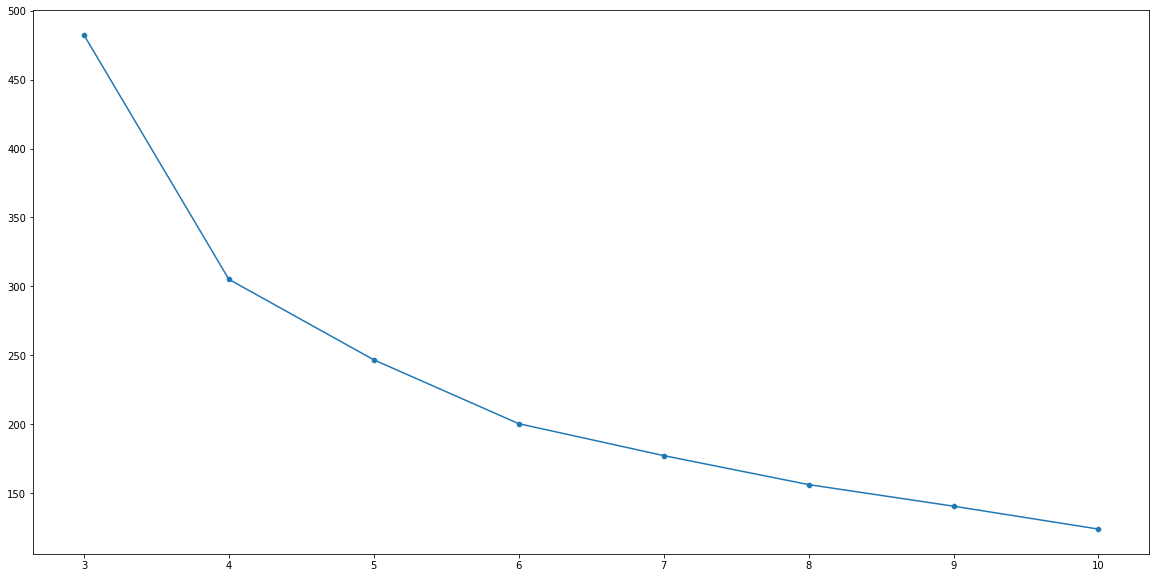

In [72]:
# Running the model
variable = []

for n_clusters in range(3, 11):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 0)
    kmeans.fit(matrix)
    variable.append(kmeans.inertia_)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, ", The average silhouette_score is:", silhouette_avg)

plt.figure(figsize=(20, 10))

sns.lineplot(x = range(3, 11), y = variable)
sns.scatterplot(x = range(3, 11), y = variable)

From the result, we can get that the best n_cluster is 4.

In [73]:
# Get the best cluster
kmeans = KMeans(n_clusters = 4, random_state=0)
kmeans.fit(sample.values)

KMeans(n_clusters=4, random_state=0)

In [74]:
# Insert the lable into the datset
sample['clusters'] = kmeans.labels_
sample.reset_index(drop = True)

,UK,Normalized_Total,Normalized_Jumlah,Normalized_Harga_Satuan,clusters
0,0,-0.027816,-0.029256,-0.059496,2
1,1,-0.018987,-0.042016,-0.000694,0
2,1,-0.064968,-0.054777,-0.089788,0
3,1,-0.019539,-0.048397,0.042072,0
4,1,-0.018987,0.009025,-0.089788,0
...,...,...,...,...,...
5200,1,-0.068095,-0.061157,-0.075533,0
5201,1,-0.060370,-0.048397,-0.089788,0
5202,1,0.056054,0.009025,-0.029204,0
5203,1,-0.056949,0.009025,-0.120436,0


In [76]:
# Check the total value
sample['clusters'].value_counts()

0    4762
2     415
3      23
1       5
Name: clusters, dtype: int64

In [77]:
# See the result
sample.groupby('clusters').mean()

,UK,Normalized_Total,Normalized_Jumlah,Normalized_Harga_Satuan
clusters,,,,
0,1.000000,-0.017928,-0.017237,-0.018130
1,0.800000,0.782200,-0.061157,8.162263
2,0.000000,0.054857,0.055961,-0.015912
3,0.869565,2.059374,1.909205,-0.040933


### 4. Hidden Insight

**Answer:**

### Knowing the total Retur

In [98]:
# Get the negative value
answer_4 = dataset_cleaned.copy()
answer_4 = dataset_cleaned[dataset_cleaned['Jumlah'] < 0]
answer_4['Jumlah'].sum()

-47963.0

There is 47,963 items that is retured. It shoul be more aware with the retured items handling.

### Knowing the most 'Barang' is Retured

In [103]:
# Get the negative value
answer_4 = dataset_cleaned[dataset_cleaned['Jumlah'] < 0]
answer_4[['Barang', 'Jumlah']].groupby('Barang').sum().sort_values(by = 'Jumlah', ascending = True).reset_index()

,Barang,Jumlah
0,WHITE HANGING HEART T-LIGHT HOLDER,-46156.0
1,POSSIBLE DAMAGES OR LOST?,-750.0
2,MERCHANT CHANDLER CREDIT ERROR STO,-576.0
3,WET/MOULDY,-192.0
4,MIA,-154.0
5,CHECK,-134.0
6,DAMAGED,-1.0


The most retured items is WHITE HANGING HEART T-LIGHT HOLDER. The number is 46,156 out of 47,963 or about 96.23% of the total retured items. It is a huge number.

### Check the Country that has the most retured items

In [104]:
# Get the negative value
answer_4 = dataset_cleaned[dataset_cleaned['Jumlah'] < 0]
answer_4[['Negara', 'Jumlah']].groupby('Negara').sum().sort_values(by = 'Jumlah', ascending = True).reset_index()

,Negara,Jumlah
0,United Kingdom,-47963.0


United Kingdom is the only one country that has retured the items.